# Video Face Manipulation Detection Through Ensemble of CNNs
Image and Sound Processing Lab - Politecnico di Milano
- Nicolò Bonettini
- Edoardo Daniele Cannas
- Sara Mandelli
- Luca Bondi
- Paolo Bestagini

In [ ]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

In [77]:
dfs = []
for path in Path('fpv').glob('*.json'):
    try:
        fpv = int(path.name.split('ff-c23-720-140-140-')[1].split('fpv')[0])
    except IndexError:
        fpv = 32
    split = path.name.split('tag-')[1].split('_loss')[0]
    df = pd.read_json(path,)
    df.rename(columns={0:'timestamp',1:'iter',2:'loss'},inplace=True)
    df['split'] = split
    df['fpv'] = fpv
    dfs.append(df)

In [78]:
df_all = pd.concat(dfs,ignore_index=True)
df_all

,timestamp,iter,loss,split,fpv
0,1.586856e+09,100,0.664077,train,10
1,1.586856e+09,200,0.602064,train,10
2,1.586856e+09,300,0.548841,train,10
3,1.586856e+09,400,0.517333,train,10
4,1.586856e+09,500,0.501915,train,10
...,...,...,...,...,...
2155,1.586862e+09,28000,0.484979,val,15
2156,1.586862e+09,28500,0.471129,val,15
2157,1.586862e+09,29000,0.527016,val,15
2158,1.586862e+09,29500,0.471535,val,15


<IPython.core.display.Javascript object>


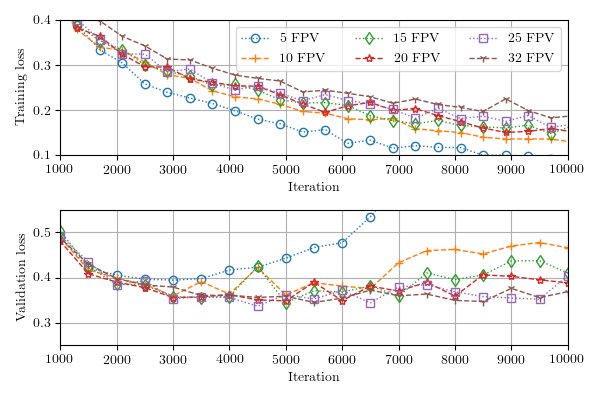

In [80]:
%matplotlib notebook

markers = ['o','+','d','*','s','1']
linestyles = [':','--',':','--',':','--']

fig,ax = plt.subplots(2,1,figsize=(6,4))

df_train = df_all[df_all['split']=='train']
for idx,fpv in enumerate(sorted(df_train['fpv'].unique())):
    df_fpv = df_train[df_train['fpv']==fpv]
    ax[0].plot(df_fpv['iter'][::4],df_fpv['loss'][::4],label='{:d} FPV'.format(fpv),
               marker=markers[idx],linestyle=linestyles[idx],fillstyle='none',linewidth=1)

ax[0].grid(True)
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Training loss')
ax[0].legend(loc='upper right',ncol=3)
ax[0].set_xlim([1000,10000])
ax[0].set_yticks(np.arange(0,1,0.1))
ax[0].set_ylim([0.1,0.4])


df_val = df_all[df_all['split']=='val']
for idx,fpv in enumerate(sorted(df_train['fpv'].unique())):
    df_fpv = df_val[df_val['fpv']==fpv]
    ax[1].plot(df_fpv['iter'],df_fpv['loss'],label='{:d} FPV'.format(fpv),
               marker=markers[idx],linestyle=linestyles[idx],fillstyle='none',linewidth=1)

ax[1].grid(True)
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Validation loss')
ax[1].set_xlim([1000,10000])
ax[1].set_yticks(np.arange(0,1,0.1))
ax[1].set_ylim([0.25,0.55])


fig.tight_layout()
fig.savefig('xception_train_val.pdf')